This is the version of python you are using


In [3]:
import sys
sys.version

'3.9.6 (default, Jun 30 2021, 10:22:16) \n[GCC 11.1.0]'

Here is an explanation of the groupby function 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

Here are some guides on merging

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [4]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf
import warnings

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

warnings.filterwarnings('ignore')

Create a fake data set and make a plot

In [5]:
###This is fake data.  You will want to read in your data using pandas 'pd.read_csv' if it is in .csv format.

data = pd.DataFrame({"Month" : ["01","02","03","04","05"], 
                     "Sales" : [25,30,35,40,35]})

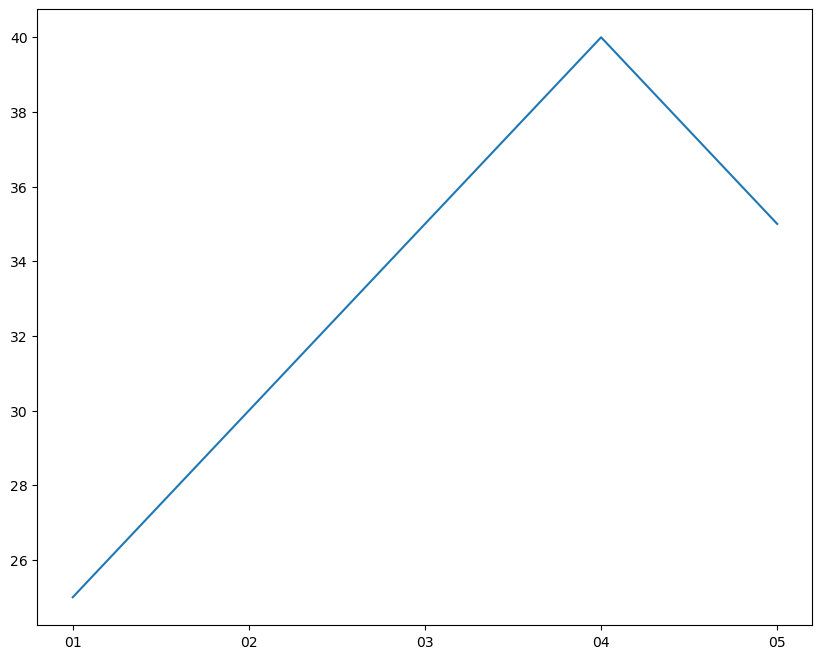

In [6]:
### The default is a line plot.

plt.plot(data.Month, data.Sales)

<BarContainer object of 5 artists>

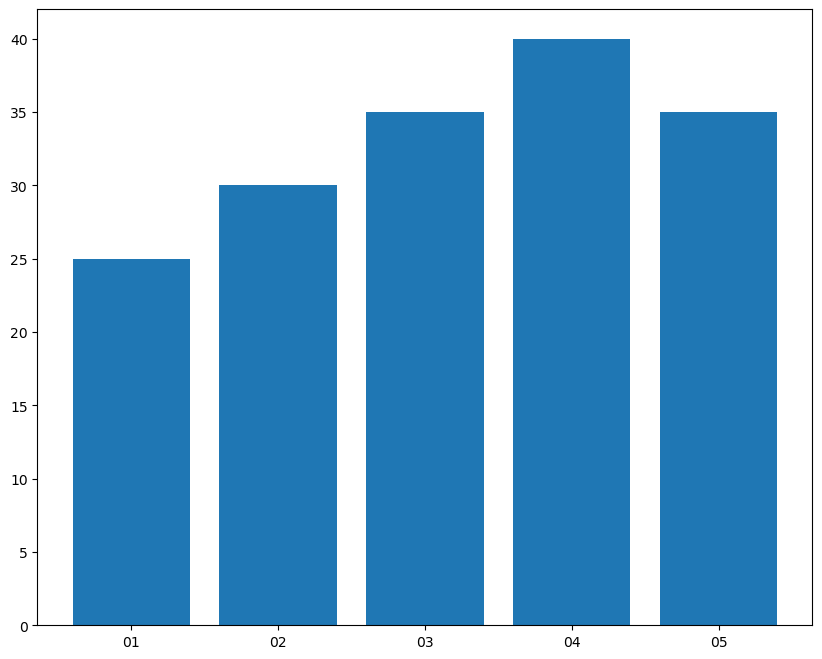

In [7]:
### There are a lot of options if you read the documentation on pyplot.

plt.bar(data.Month, data.Sales)

The examples in this documentation are super helpful.

https://matplotlib.org/stable/gallery/index.html

Reading our data

In [9]:
vaccinations = pd.read_csv("COVID-19_Vaccinations_in_the_United_States.csv")
vaccinations.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Series_Complete_FedLTC,Series_Complete_FedLTC_Residents,Series_Complete_FedLTC_Staff,Series_Complete_FedLTC_Unknown
0,08/08/2021,32,MA,10107570,444700,4089500,5573370,0,146646,167991,...,2175654,80,66351,463713,489703,28,138948,65547,60099,13302
1,08/08/2021,32,KS,3333845,173500,1427740,1732605,0,114435,135981,...,643326,299,15892,186545,184571,156,38986,20959,11140,6887
2,08/08/2021,32,NC,12394800,646500,5123160,6625140,0,118180,137942,...,2321003,71,42549,653666,658993,36,90581,47820,29598,13163
3,08/08/2021,32,WI,6513545,318700,2734120,3460725,0,111870,130276,...,1470812,322,26249,435655,436355,139,65726,34673,23224,7829
4,08/08/2021,32,UT,3432260,172400,1425480,1834380,0,107059,132404,...,670867,3,14793,128726,151615,0,21811,8044,7606,6161


In [10]:
cases = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,08/06/2021,VT,23640,NaN,NaN,0,0.0,252,NaN,NaN,0,0.0,08/07/2021 2:00:45 PM,Not agree,Not agree
1,08/06/2021,DE,112298,104274.0,8024.0,228,26.0,1833,1676.0,157.0,0,0.0,08/07/2021 2:00:45 PM,Agree,Agree
2,08/06/2021,MD,473116,NaN,NaN,892,0.0,9849,9629.0,220.0,3,0.0,08/07/2021 2:00:45 PM,NaN,Agree
3,08/06/2021,ND,112285,102543.0,9742.0,116,43.0,1542,NaN,NaN,0,0.0,08/07/2021 2:00:45 PM,Agree,Not agree
4,08/06/2021,ID,204091,163114.0,40977.0,679,152.0,2217,1928.0,289.0,3,2.0,08/07/2021 2:00:45 PM,Agree,Agree


In [11]:
travel_numbers = pd.read_csv("TSA.csv")
travel_numbers.head()

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
0,08/07/2021,1925641.0,683212,2290340
1,08/06/2021,2109091.0,762547,2725000
2,08/05/2021,2063720.0,743599,2707986
3,08/04/2021,1855299.0,595739,2430094
4,08/03/2021,1797120.0,543601,2387115


In [12]:
travel_numbers.dtypes

Date                         object
2021 Traveler Throughput    float64
2020 Traveler Throughput      int64
2019 Traveler Throughput      int64
dtype: object

In [13]:
travel_numbers['Date'] = pd.to_datetime(travel_numbers['Date'])

In [14]:
travel_numbers.dtypes

Date                        datetime64[ns]
2021 Traveler Throughput           float64
2020 Traveler Throughput             int64
2019 Traveler Throughput             int64
dtype: object

Preparing the vaccinations dataset

In [15]:
vaccinations.drop(columns=['MMWR_week', 'Distributed_Janssen', 'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf', 'Dist_Per_100K', 'Distributed_Per_100k_12Plus', 'Series_Complete_Pfizer_18Plus', 'Series_Complete_Unk_Manuf_18Plus', 'Series_Complete_Janssen_65Plus', 'Series_Complete_Moderna_65Plus', 'Series_Complete_Pfizer_65Plus', 'Series_Complete_Unk_Manuf_65Plus', 'Series_Complete_FedLTC', 'Series_Complete_FedLTC_Residents', 'Series_Complete_FedLTC_Staff', 'Series_Complete_FedLTC_Unknown', 'Distributed_Per_100k_18Plus', 'Distributed_Per_100k_65Plus', 'Administered_12Plus', 'Administered_18Plus', 'Administered_65Plus', 'Administered_Janssen', 'Series_Complete_Janssen', 'Series_Complete_Moderna', 'Series_Complete_Pfizer', 'Series_Complete_Unk_Manuf', 'Series_Complete_Janssen_12Plus', 'Series_Complete_Moderna_12Plus', 'Series_Complete_Pfizer_12Plus', 'Series_Complete_Unk_Manuf_12Plus', 'Series_Complete_Janssen_18Plus', 'Series_Complete_Moderna_18Plus', 'Administered_Moderna', 'Administered_Pfizer', 'Administered_Unk_Manuf', 'Administered_Fed_LTC', 'Administered_Fed_LTC_Residents', 'Administered_Fed_LTC_Staff', 'Administered_Dose1_Recip_65Plus', 'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes', 'Series_Complete_Pop_Pct', 'Series_Complete_12Plus', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus', 'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus', 'Series_Complete_65PlusPop_Pct', 'Administered_Fed_LTC_Unk', 'Administered_Fed_LTC_Dose1', 'Administered_Fed_LTC_Dose1_Residents', 'Administered_Fed_LTC_Dose1_Staff', 'Administered_Fed_LTC_Dose1_Unk', 'Admin_Per_100K', 'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus', 'Admin_Per_100k_65Plus', 'Recip_Administered', 'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_12PlusPop_Pct', 'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_18PlusPop_Pct', 'Location', 'Distributed'], inplace=True)
vaccinations = vaccinations.iloc[520:6500]
vaccinations.reset_index(inplace=True)
vaccinations.drop(columns=['index'], inplace=True)
vaccinations

,Date,Administered
0,07/31/2021,1666488
1,07/31/2021,9679982
2,07/31/2021,36054
3,07/31/2021,5755732
4,07/31/2021,9722902
...,...,...
5975,05/01/2021,7078485
5976,05/01/2021,1239820
5977,05/01/2021,2408958
5978,05/01/2021,771295


In [16]:
vaccinations['Date'] = pd.to_datetime(vaccinations['Date'])
vaccinations.dtypes

Date            datetime64[ns]
Administered             int64
dtype: object

In [17]:
df_vaccine = vaccinations.groupby(pd.Grouper(key='Date', freq='D')).sum()
df_vaccine

,Administered
Date,
2021-05-01,502980017
2021-05-02,507291071
2021-05-03,509700681
2021-05-04,511684721
2021-05-05,515317513
...,...
2021-07-27,702977705
2021-07-28,704494043
2021-07-29,705932348


Vaccination dataframe for May, June, and July

In [18]:
df_vaccine.reset_index(inplace=True)
df_vaccine

,Date,Administered
0,2021-05-01,502980017
1,2021-05-02,507291071
2,2021-05-03,509700681
3,2021-05-04,511684721
4,2021-05-05,515317513
...,...,...
87,2021-07-27,702977705
88,2021-07-28,704494043
89,2021-07-29,705932348
90,2021-07-30,707660172


In [19]:
df_vaccine.to_csv("Vaccines_Administered_per_day.csv", index=False)

Dataframe for July, vaccinations

In [20]:
df_vaccine_july = df_vaccine.iloc[61:-1]
df_vaccine_july.reset_index(inplace=True)
df_vaccine_july.drop(columns=['index'], inplace=True)
df_vaccine_july

,Date,Administered
0,2021-07-01,673855029
1,2021-07-02,675184975
2,2021-07-03,677521708
3,2021-07-04,678824343
4,2021-07-05,679630015
5,2021-07-06,680094016
6,2021-07-07,680969411
7,2021-07-08,682372114
8,2021-07-09,683626952
9,2021-07-10,684836241


Dataframe for May and June, vaccinations

In [21]:
df_vaccine_may_june = df_vaccine.iloc[0:61]
df_vaccine_may_june 

,Date,Administered
0,2021-05-01,502980017
1,2021-05-02,507291071
2,2021-05-03,509700681
3,2021-05-04,511684721
4,2021-05-05,515317513
...,...,...
56,2021-06-26,661633477
57,2021-06-27,664049390
58,2021-06-28,666272326
59,2021-06-29,667790635


Preparing the COVID-19 cases dataset

In [22]:
cases.drop(columns=['state', 'conf_cases', 'prob_cases', 'pnew_case', 'conf_death', 'prob_death', 'pnew_death', 'created_at', 'consent_cases', 'consent_deaths'], inplace=True)
cases = cases.iloc[360:5880]
cases.reset_index(inplace=True)
cases.drop(columns=['index','new_case', 'tot_death', 'new_death'], inplace=True)
cases.rename(columns={'submission_date':'Date', 'tot_cases':'Total_Cases'}, inplace=True)
cases

,Date,Total_Cases
0,07/31/2021,354749
1,07/31/2021,116454
2,07/31/2021,100766
3,07/31/2021,200773
4,07/31/2021,475146
...,...,...
5515,05/01/2021,972857
5516,05/01/2021,579805
5517,05/01/2021,661314
5518,05/01/2021,185597


In [23]:
cases['Date'] = pd.to_datetime(cases['Date'])
cases.dtypes

Date           datetime64[ns]
Total_Cases             int64
dtype: object

In [24]:
df_covid_cases = cases.groupby(pd.Grouper(key='Date', freq='D')).sum()
df_covid_cases

,Total_Cases
Date,
2021-05-01,32426535
2021-05-02,32462590
2021-05-03,32495833
2021-05-04,32539421
2021-05-05,32584476
...,...
2021-07-27,34669114
2021-07-28,34759637
2021-07-29,34852240


Covid-19 cases dataframe for May, June, and July

In [25]:
df_covid_cases.reset_index(inplace=True)
df_covid_cases

,Date,Total_Cases
0,2021-05-01,32426535
1,2021-05-02,32462590
2,2021-05-03,32495833
3,2021-05-04,32539421
4,2021-05-05,32584476
...,...,...
87,2021-07-27,34669114
88,2021-07-28,34759637
89,2021-07-29,34852240
90,2021-07-30,34957233


In [26]:
df_covid_cases.to_csv("COVID-19_US_cases_per_day.csv", index=False)

Dataframe for July, covid cases

In [27]:
df_cases_july = df_covid_cases.iloc[61:-1]
df_cases_july.reset_index(inplace=True)
df_cases_july.drop(columns=['index'], inplace=True)
df_cases_july

,Date,Total_Cases
0,2021-07-01,33679286
1,2021-07-02,33696271
2,2021-07-03,33711388
3,2021-07-04,33724251
4,2021-07-05,33735891
5,2021-07-06,33751019
6,2021-07-07,33774766
7,2021-07-08,33804813
8,2021-07-09,33834882
9,2021-07-10,33859227


Dataframe for May and June, covid cases

In [28]:
df_cases_may_june = df_covid_cases.iloc[0:61]
df_cases_may_june 

,Date,Total_Cases
0,2021-05-01,32426535
1,2021-05-02,32462590
2,2021-05-03,32495833
3,2021-05-04,32539421
4,2021-05-05,32584476
...,...,...
56,2021-06-26,33607501
57,2021-06-27,33616914
58,2021-06-28,33626661
59,2021-06-29,33642964


Preparing out TSA dataset

In [29]:
travel_numbers.drop(columns=['2019 Traveler Throughput','2020 Traveler Throughput'], inplace=True)
travel_numbers = travel_numbers.iloc[7:99]
travel_numbers.reset_index(inplace=True)
travel_numbers.drop(columns=['index'], inplace=True)
travel_numbers

,Date,2021 Traveler Throughput
0,2021-07-31,2007412.0
1,2021-07-30,2198585.0
2,2021-07-29,2127634.0
3,2021-07-28,1923980.0
4,2021-07-27,1858328.0
...,...,...
87,2021-05-05,1268938.0
88,2021-05-04,1134103.0
89,2021-05-03,1463672.0
90,2021-05-02,1626962.0


In [30]:
travel_numbers["2021 Traveler Throughput"] = travel_numbers["2021 Traveler Throughput"].astype(int)
travel_numbers.dtypes

Date                        datetime64[ns]
2021 Traveler Throughput             int64
dtype: object

In [31]:
df_travel = travel_numbers.groupby(pd.Grouper(key="Date", freq="D")).sum()
df_travel

,2021 Traveler Throughput
Date,
2021-05-01,1335535
2021-05-02,1626962
2021-05-03,1463672
2021-05-04,1134103
2021-05-05,1268938
...,...
2021-07-27,1858328
2021-07-28,1923980
2021-07-29,2127634


TSA checkpoint dataframe for May, June, and July

In [32]:
df_travel.reset_index(inplace=True)
df_travel

,Date,2021 Traveler Throughput
0,2021-05-01,1335535
1,2021-05-02,1626962
2,2021-05-03,1463672
3,2021-05-04,1134103
4,2021-05-05,1268938
...,...,...
87,2021-07-27,1858328
88,2021-07-28,1923980
89,2021-07-29,2127634
90,2021-07-30,2198585


In [33]:
df_travel.to_csv("TSA_Checkpoints_per_day.csv", index=False)

Dataframe for July, traveling

In [34]:
df_travel_july = df_travel.iloc[61:-1]
df_travel_july.reset_index(inplace=True)
df_travel_july.drop(columns=['index'], inplace=True)
df_travel_july

,Date,2021 Traveler Throughput
0,2021-07-01,2147090
1,2021-07-02,2196411
2,2021-07-03,1915017
3,2021-07-04,1681896
4,2021-07-05,2160147
5,2021-07-06,1889911
6,2021-07-07,1880160
7,2021-07-08,2027364
8,2021-07-09,2147903
9,2021-07-10,1987652


Dataframe for May and June, traveling

In [35]:
df_travel_may_june = df_travel.iloc[0:61]
df_travel_may_june 

,Date,2021 Traveler Throughput
0,2021-05-01,1335535
1,2021-05-02,1626962
2,2021-05-03,1463672
3,2021-05-04,1134103
4,2021-05-05,1268938
...,...,...
56,2021-06-26,1918705
57,2021-06-27,2167380
58,2021-06-28,2066964
59,2021-06-29,1808306


The vaccination dataset illustrated by a bar chart


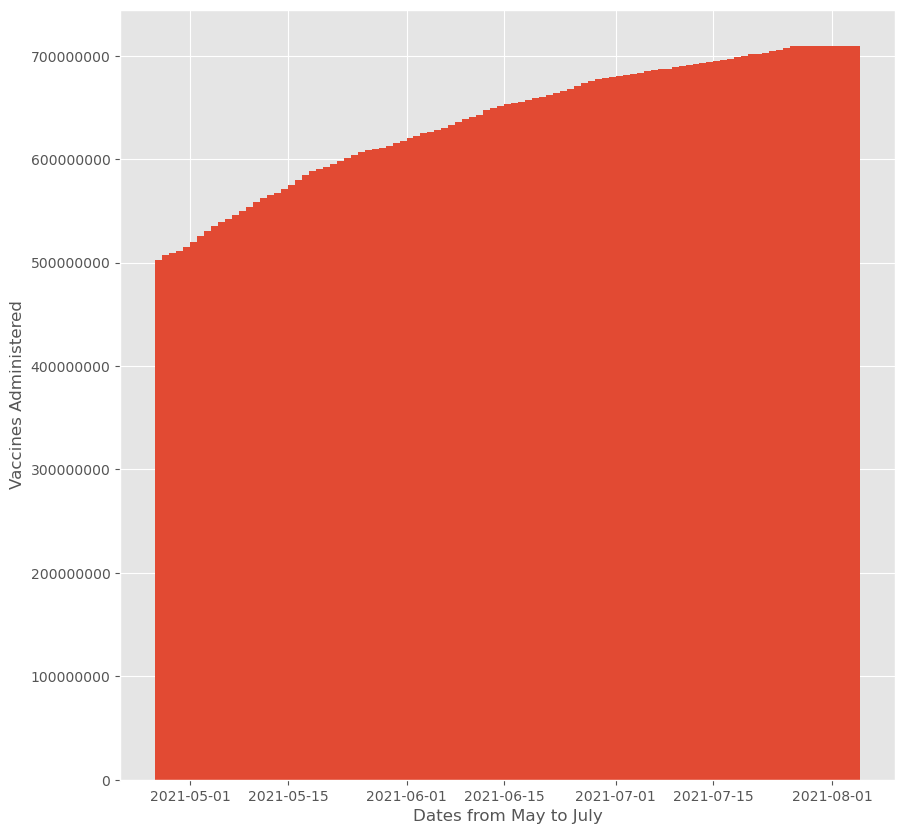

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.bar(df_vaccine["Date"], df_vaccine["Administered"], width=10)
plt.xlabel("Dates from May to July")
plt.ylabel("Vaccines Administered")
plt.ticklabel_format(axis="y", style="plain", scilimits=None, useOffset=False, useLocale=False, useMathText=False)
plt.show()

The covid cases dataset illustrated by a scatter plot

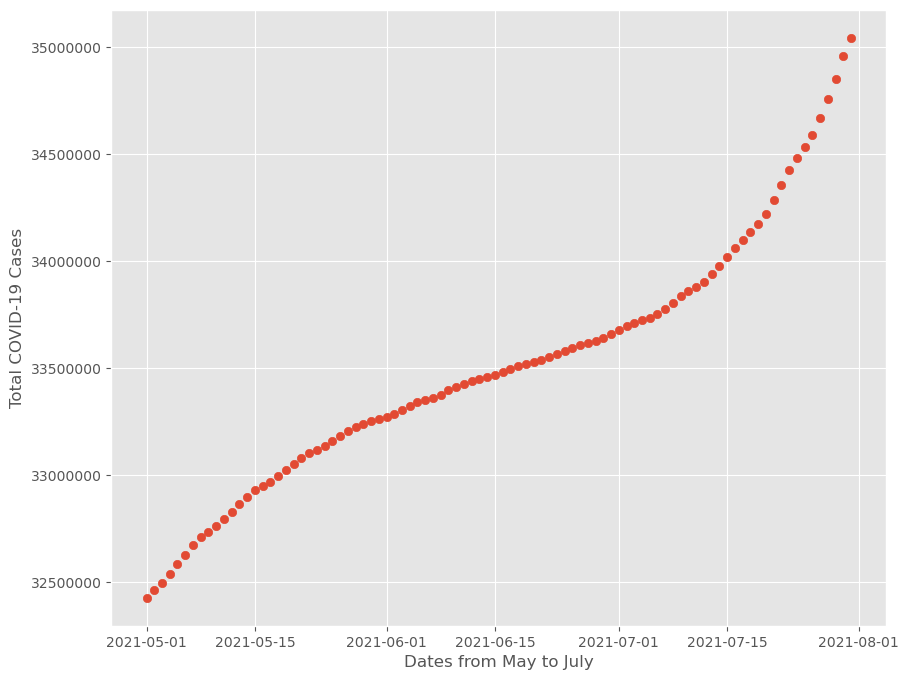

In [37]:
plt.style.use('ggplot')
#plt.figure(figsize=(10,10))
plt.scatter(df_covid_cases["Date"], df_covid_cases["Total_Cases"])
plt.xlabel("Dates from May to July")
plt.ylabel("Total COVID-19 Cases")
plt.ticklabel_format(axis="y", style="plain", scilimits=None, useOffset=False, useLocale=False, useMathText=False)
plt.show()

Merging our data

In [38]:
merged_df = pd.merge(df_covid_cases, df_vaccine, how='inner', on='Date')
merged_df = pd.merge(merged_df, df_travel, how='inner', on='Date')
merged_df.head()

,Date,Total_Cases,Administered,2021 Traveler Throughput
0,2021-05-01,32426535,502980017,1335535
1,2021-05-02,32462590,507291071,1626962
2,2021-05-03,32495833,509700681,1463672
3,2021-05-04,32539421,511684721,1134103
4,2021-05-05,32584476,515317513,1268938


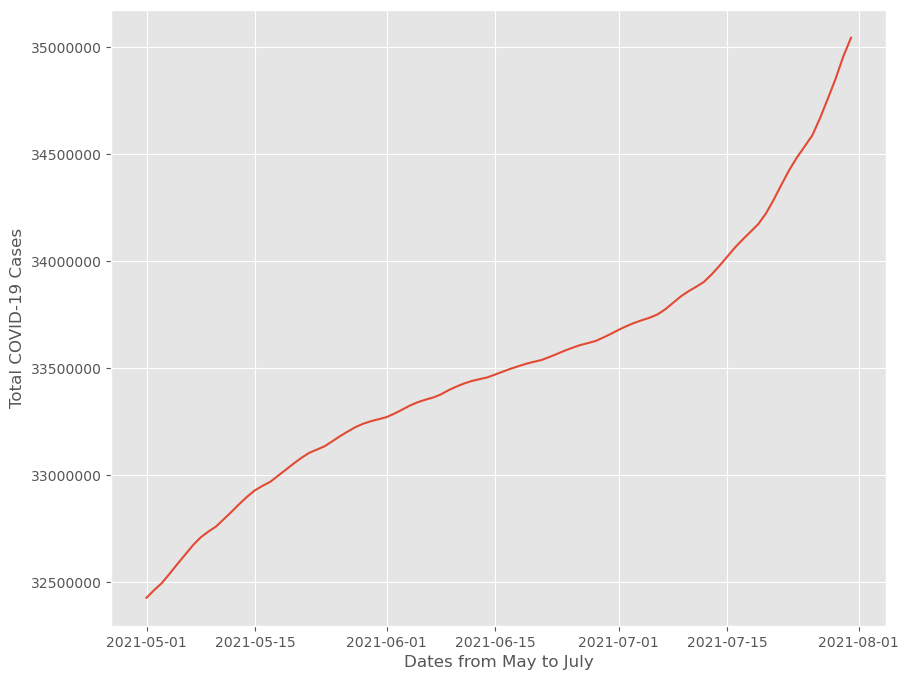

In [39]:
plt.plot(merged_df["Date"], merged_df["Total_Cases"])
plt.xlabel("Dates from May to July")
plt.ylabel("Total COVID-19 Cases")
plt.ticklabel_format(axis="y", style="plain", scilimits=None, useOffset=False, useLocale=False, useMathText=False)
plt.show()

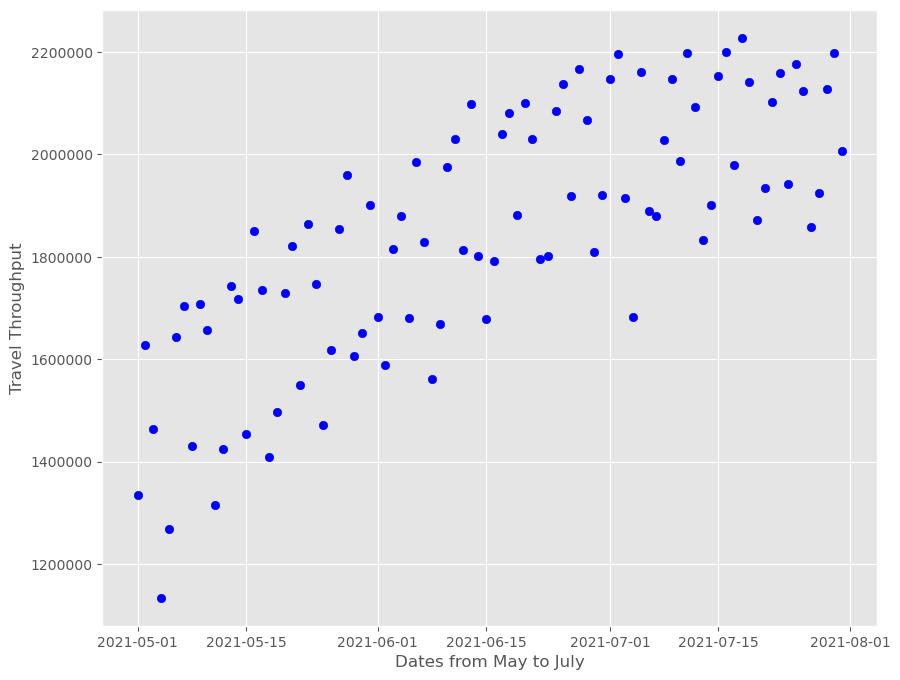

In [40]:

plt.scatter(merged_df["Date"], merged_df["2021 Traveler Throughput"], color="blue")
plt.xlabel("Dates from May to July")
plt.ylabel("Travel Throughput")
plt.ticklabel_format(axis="y", style="plain", scilimits=None, useOffset=False, useLocale=False, useMathText=False)
plt.show()

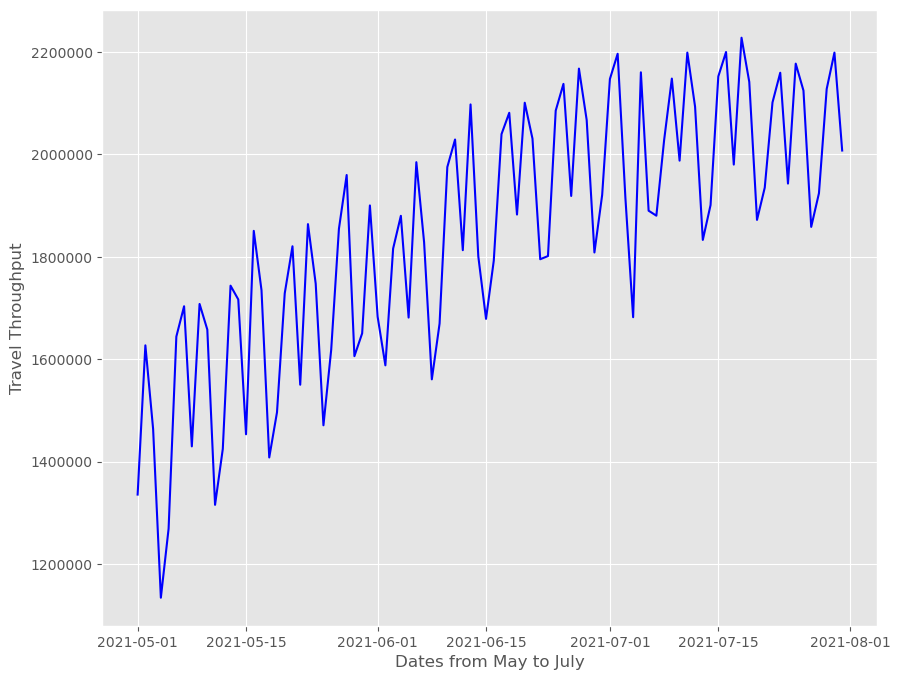

In [41]:
plt.plot(merged_df["Date"], merged_df["2021 Traveler Throughput"], "blue")
plt.xlabel("Dates from May to July")
plt.ylabel("Travel Throughput")
plt.ticklabel_format(axis="y", style="plain", scilimits=None, useOffset=False, useLocale=False, useMathText=False)
plt.show()

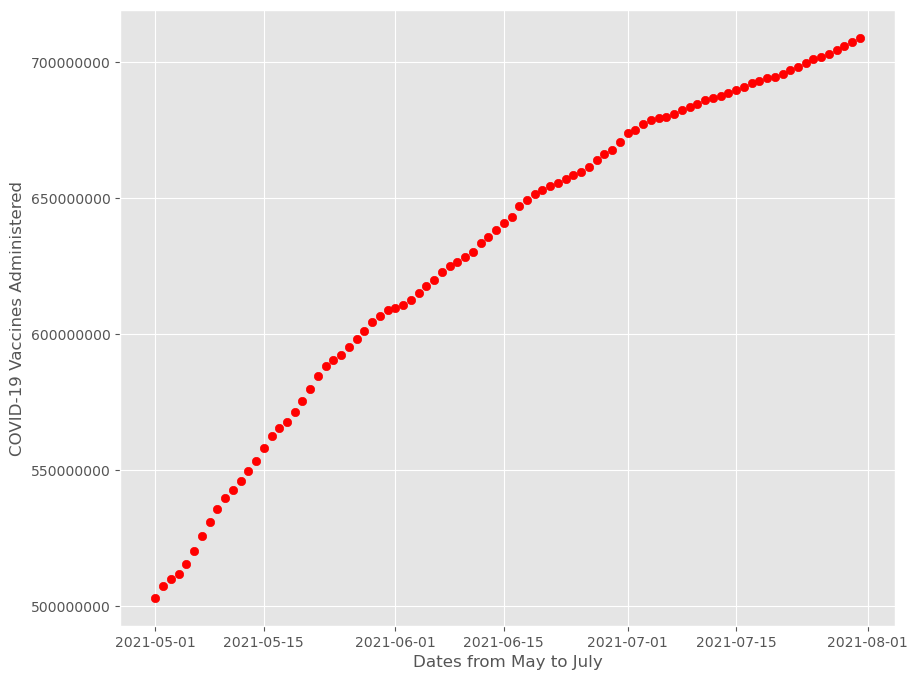

In [42]:
plt.scatter(merged_df["Date"], merged_df["Administered"], color="red")
plt.xlabel("Dates from May to July")
plt.ylabel("COVID-19 Vaccines Administered")
plt.ticklabel_format(axis="y", style="plain", scilimits=None, useOffset=False, useLocale=False, useMathText=False)
plt.show()

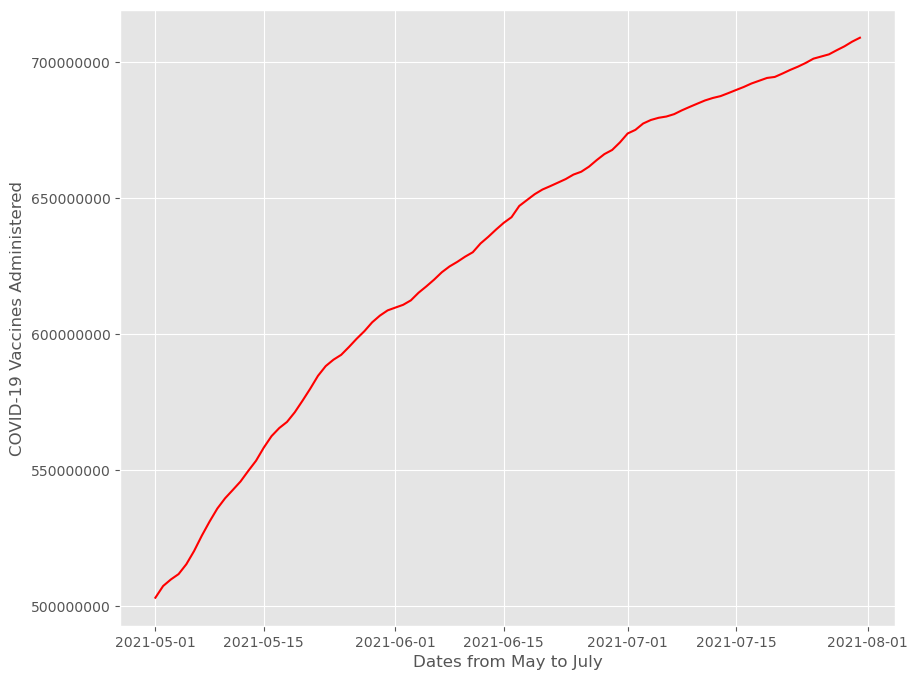

In [43]:
plt.plot(merged_df["Date"], merged_df["Administered"], "red")
plt.xlabel("Dates from May to July")
plt.ylabel("COVID-19 Vaccines Administered")
plt.ticklabel_format(axis="y", style="plain", scilimits=None, useOffset=False, useLocale=False, useMathText=False)
plt.show()

In [44]:
merged_df.rename(columns={'Total_Cases':'Total COVID-19 Cases', 'Administered':'Vaccines Administered', '2021 Traveler Throughput':'2021 US Travel Numbers'}, inplace=True)

In [45]:
merged_df.to_csv("COVID-19_Vaccines_Travel.csv", index=False)

Reading the new csv file

In [46]:
df = pd.read_csv("COVID-19_Vaccines_Travel.csv", index_col=0, parse_dates=True)
df

,Total COVID-19 Cases,Vaccines Administered,2021 US Travel Numbers
Date,,,
2021-05-01,32426535,502980017,1335535
2021-05-02,32462590,507291071,1626962
2021-05-03,32495833,509700681,1463672
2021-05-04,32539421,511684721,1134103
2021-05-05,32584476,515317513,1268938
...,...,...,...
2021-07-27,34669114,702977705,1858328
2021-07-28,34759637,704494043,1923980
2021-07-29,34852240,705932348,2127634


We are going to check whether our times series is stationary or not

In [47]:
for i in range(len(df.columns)):
	result = adfuller(df[df.columns[i]])
	if result[1] > .05:
		print('{} - Series is not Stationary'.format(df.columns[i]))
	else:
		print('{} - Series is Stationary'.format(df.columns[i]))

Total COVID-19 Cases - Series is not Stationary
Vaccines Administered - Series is Stationary
2021 US Travel Numbers - Series is not Stationary


We are going to make the columns Total COVID-19 Cases and 2021 US Travel Numbers stationary by order differencing

In [48]:
covid = pd.read_csv("COVID-19_US_cases_per_day.csv", index_col=0, parse_dates=True)
covid

,Total_Cases
Date,
2021-05-01,32426535
2021-05-02,32462590
2021-05-03,32495833
2021-05-04,32539421
2021-05-05,32584476
...,...
2021-07-27,34669114
2021-07-28,34759637
2021-07-29,34852240


In [49]:
covid = covid.diff().dropna()
for i in range(len(covid.columns)):
	result = adfuller(covid[covid.columns[i]])
	if result[1] > .05:
		print('{} - Series is not Stationary'.format(covid.columns[i]))
	else:
		print('{} - Series is Stationary'.format(covid.columns[i]))

Total_Cases - Series is not Stationary


In [50]:
covid

,Total_Cases
Date,
2021-05-02,36055.0
2021-05-03,33243.0
2021-05-04,43588.0
2021-05-05,45055.0
2021-05-06,43642.0
...,...
2021-07-27,80696.0
2021-07-28,90523.0
2021-07-29,92603.0


In [51]:
travel = pd.read_csv("TSA_Checkpoints_per_day.csv", index_col=0, parse_dates=True)
travel

,2021 Traveler Throughput
Date,
2021-05-01,1335535
2021-05-02,1626962
2021-05-03,1463672
2021-05-04,1134103
2021-05-05,1268938
...,...
2021-07-27,1858328
2021-07-28,1923980
2021-07-29,2127634


In [52]:
travel = travel.diff().dropna()
for i in range(len(travel.columns)):
	result = adfuller(travel[travel.columns[i]])
	if result[1] > .05:
		print('{} - Series is not Stationary'.format(travel.columns[i]))
	else:
		print('{} - Series is Stationary'.format(travel.columns[i]))

2021 Traveler Throughput - Series is Stationary


In [53]:
travel

,2021 Traveler Throughput
Date,
2021-05-02,291427.0
2021-05-03,-163290.0
2021-05-04,-329569.0
2021-05-05,134835.0
2021-05-06,375112.0
...,...
2021-07-27,-266146.0
2021-07-28,65652.0
2021-07-29,203654.0


In [54]:
stationary_df = pd.merge(covid, df_vaccine, how='inner', on='Date')
stationary_df = pd.merge(stationary_df, travel, how='inner', on='Date')
stationary_df.head() 

,Date,Total_Cases,Administered,2021 Traveler Throughput
0,2021-05-02,36055.0,507291071,291427.0
1,2021-05-03,33243.0,509700681,-163290.0
2,2021-05-04,43588.0,511684721,-329569.0
3,2021-05-05,45055.0,515317513,134835.0
4,2021-05-06,43642.0,520178645,375112.0


In [55]:
stationary_df

,Date,Total_Cases,Administered,2021 Traveler Throughput
0,2021-05-02,36055.0,507291071,291427.0
1,2021-05-03,33243.0,509700681,-163290.0
2,2021-05-04,43588.0,511684721,-329569.0
3,2021-05-05,45055.0,515317513,134835.0
4,2021-05-06,43642.0,520178645,375112.0
...,...,...,...,...
86,2021-07-27,80696.0,702977705,-266146.0
87,2021-07-28,90523.0,704494043,65652.0
88,2021-07-29,92603.0,705932348,203654.0
89,2021-07-30,104993.0,707660172,70951.0


In [56]:
stationary_df.to_csv("stationary_df.csv", index=False)

Applying VAR, vector autoregression, on our dataset

In [57]:
df2 = pd.read_csv("stationary_df.csv", index_col=0, parse_dates=True)
df2

,Total_Cases,Administered,2021 Traveler Throughput
Date,,,
2021-05-02,36055.0,507291071,291427.0
2021-05-03,33243.0,509700681,-163290.0
2021-05-04,43588.0,511684721,-329569.0
2021-05-05,45055.0,515317513,134835.0
2021-05-06,43642.0,520178645,375112.0
...,...,...,...
2021-07-27,80696.0,702977705,-266146.0
2021-07-28,90523.0,704494043,65652.0
2021-07-29,92603.0,705932348,203654.0


In [58]:
df_train = df2[:int(.9*(len(df2)))]
df_test = df2[int(.9*(len(df2))):]

In [59]:
df_train.shape

(81, 3)

In [60]:
df_test.shape

(10, 3)

Selecting the best lag

In [61]:
model = VAR(df_train, freq="D")
model.select_order(15).summary()

,AIC,BIC,FPE,HQIC
0,77.99,78.09,7.451e+33,78.03
1,68.11,68.50,3.786e+29,68.26
2,67.36,68.05,1.794e+29,67.63
3,66.61,67.60*,8.511e+28,67.00
4,66.35,67.65,6.661e+28,66.86
5,66.05,67.64,4.994e+28,66.68
6,65.86,67.75,4.222e+28,66.61*
7,65.87,68.06,4.391e+28,66.74
8,65.74*,68.23,3.993e+28*,66.72
9,65.75,68.54,4.265e+28,66.85


In [62]:
model = VAR(df_train, freq="D")
outcome = model.fit(8)

In [63]:
outcome.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, Aug, 2021
Time:                     10:53:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    67.9246
Nobs:                     73.0000    HQIC:                   66.5092
Log likelihood:          -2629.10    FPE:                3.27225e+28
AIC:                      65.5714    Det(Omega_mle):     1.35250e+28
--------------------------------------------------------------------
Results for equation Total_Cases
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                          -28258.598200     13860.697325           -2.039           0.041
L1.Total_Cases                      0.894260         0.139792            6.397           0.00

Forecasting

In [64]:
lag=outcome.k_ar

In [65]:
pred = outcome.forecast(df_train.values[-lag:], steps=10)

In [66]:
pred = (pd.DataFrame(pred, index=df_test.index, columns= df2.columns + ' Prediction'))
pred

,Total_Cases Prediction,Administered Prediction,2021 Traveler Throughput Prediction
Date,,,
2021-07-22,67864.045266,6.983240e+08,207468.445151
2021-07-23,66425.174375,7.002128e+08,149500.064095
2021-07-24,60625.695352,7.023950e+08,-49205.851768
2021-07-25,58762.605544,7.036127e+08,-32903.810743
2021-07-26,64796.127925,7.039170e+08,-149080.655824
2021-07-27,79463.225087,7.037267e+08,-142245.476269
2021-07-28,93118.335402,7.038917e+08,72836.177874
2021-07-29,100211.026937,7.055829e+08,195646.259105
2021-07-30,100057.896579,7.076001e+08,169586.399699


In [67]:
df_test[0:10]

,Total_Cases,Administered,2021 Traveler Throughput
Date,,,
2021-07-22,70178.0,697259348,166425.0
2021-07-23,68257.0,698458911,57957.0
2021-07-24,59291.0,699823425,-216429.0
2021-07-25,51561.0,701397151,234258.0
2021-07-26,52496.0,702184652,-52655.0
2021-07-27,80696.0,702977705,-266146.0
2021-07-28,90523.0,704494043,65652.0
2021-07-29,92603.0,705932348,203654.0
2021-07-30,104993.0,707660172,70951.0


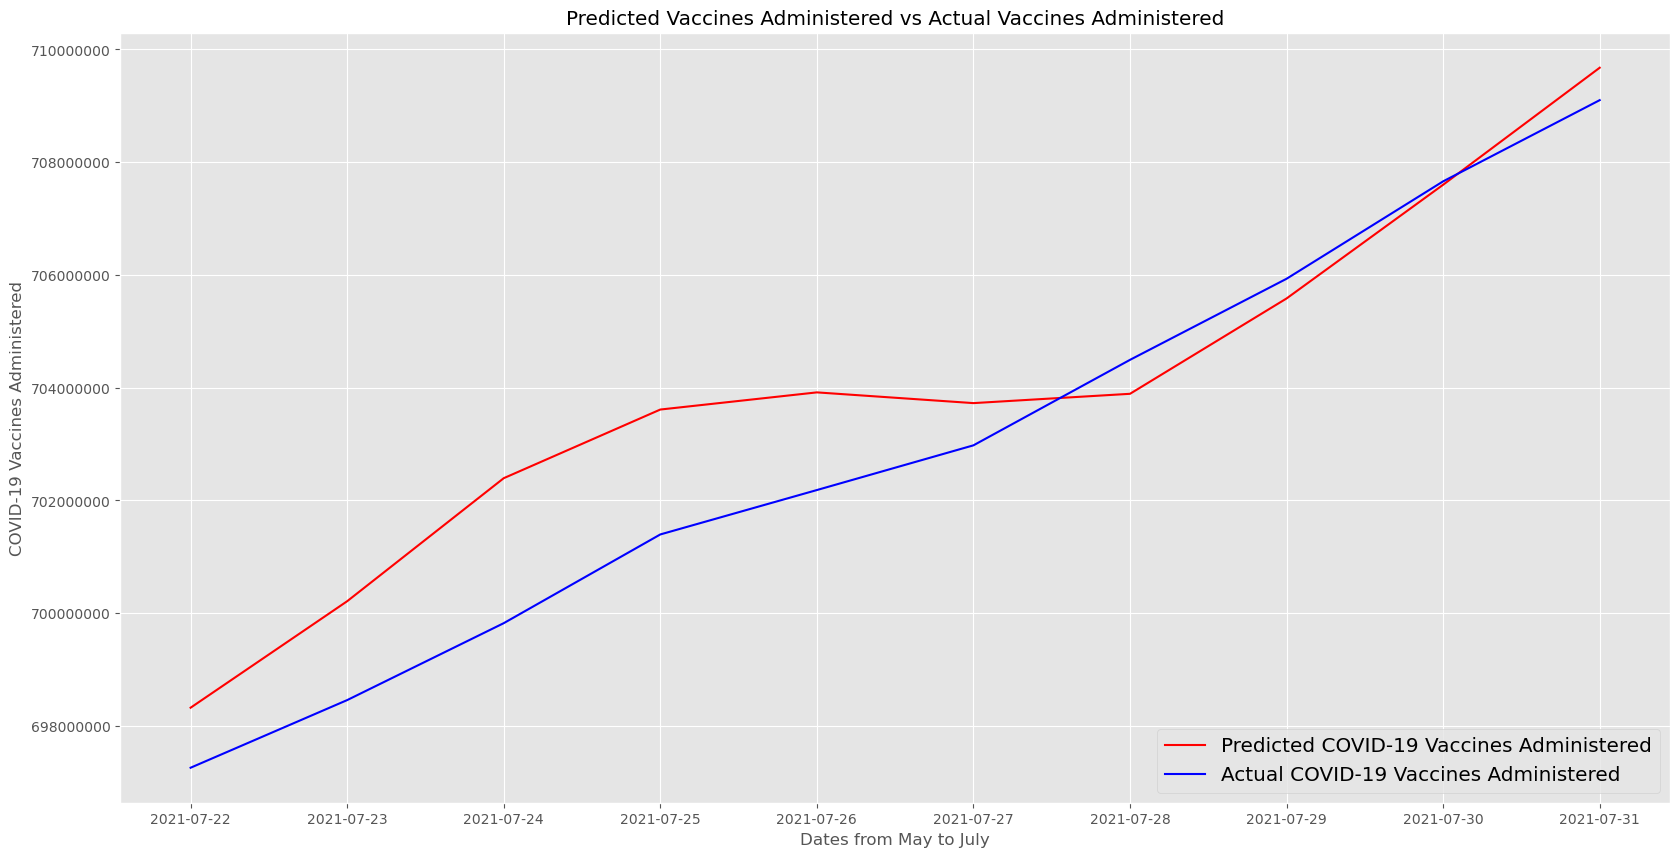

In [68]:
plt.figure(figsize=(20,10))
plt.title("Predicted Vaccines Administered vs Actual Vaccines Administered")
plt.plot(pred["Administered Prediction"], "red", label='Predicted COVID-19 Vaccines Administered')
plt.plot(df_test["Administered"], "blue", label='Actual COVID-19 Vaccines Administered')
plt.xlabel("Dates from May to July")
plt.ylabel("COVID-19 Vaccines Administered")
plt.legend(loc='lower right', fontsize='x-large')
plt.ticklabel_format(axis="y", style="plain", scilimits=None, useOffset=False, useLocale=False, useMathText=False)
plt.show()

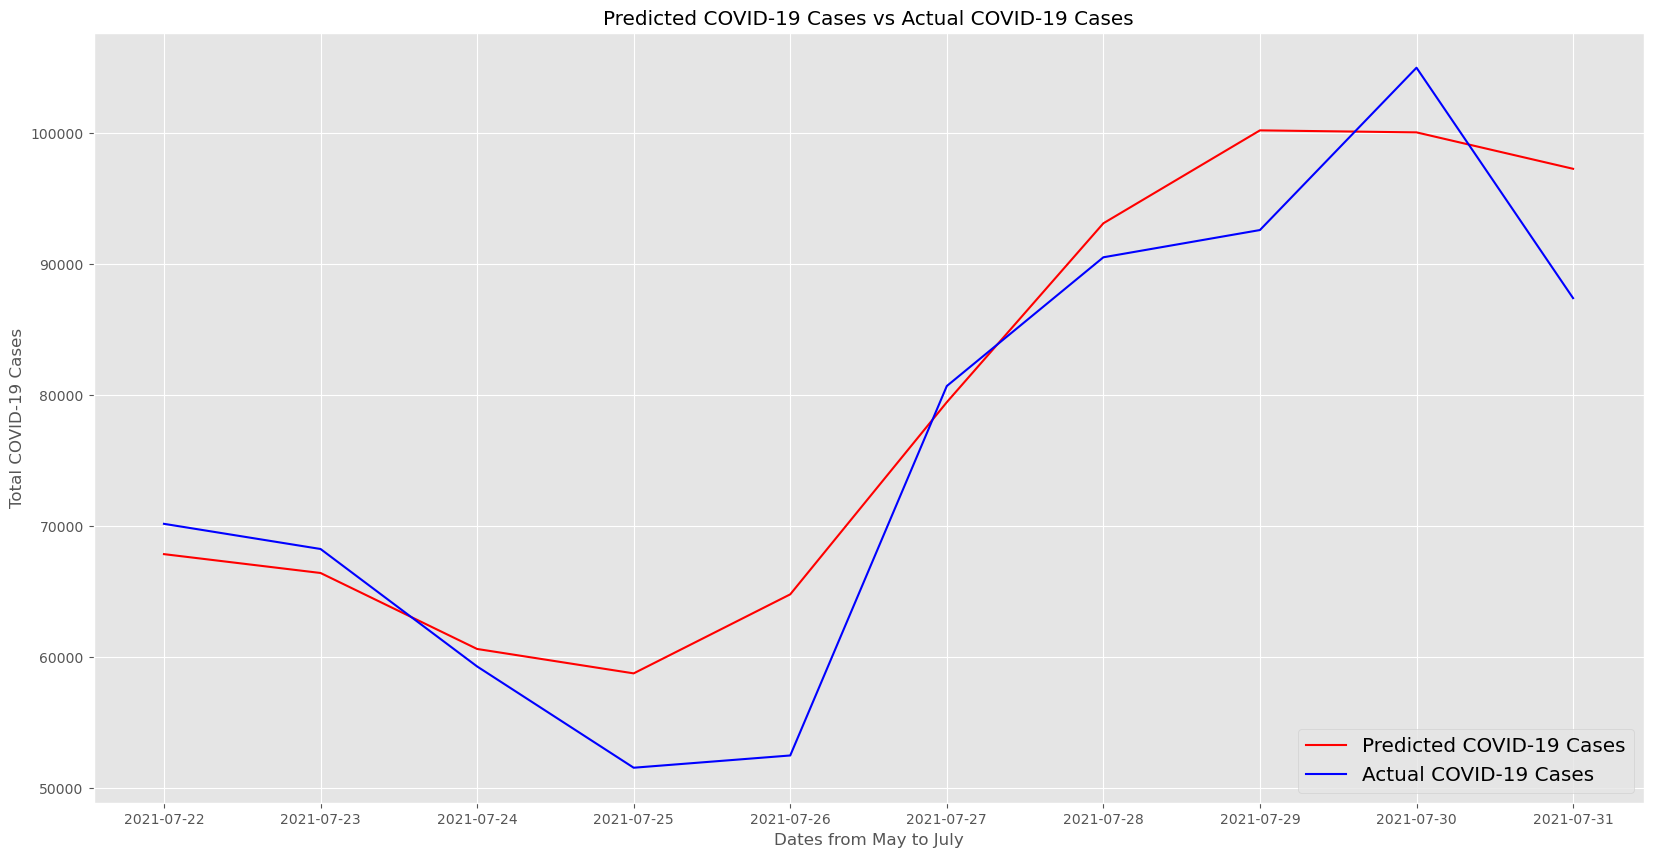

In [69]:
plt.figure(figsize=(20,10))
plt.title("Predicted COVID-19 Cases vs Actual COVID-19 Cases")
plt.plot(pred["Total_Cases Prediction"], "red", label='Predicted COVID-19 Cases')
plt.plot(df_test["Total_Cases"], "blue", label='Actual COVID-19 Cases')
plt.xlabel("Dates from May to July")
plt.ylabel("Total COVID-19 Cases")
plt.legend(loc='lower right', fontsize='x-large')
plt.ticklabel_format(axis="y", style="plain", scilimits=None, useOffset=False, useLocale=False, useMathText=False)
plt.show()

Forecast Evaluation

In [70]:
def adjust(val, length= 6): return str(val).ljust(length)
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Total_Cases Prediction')
accuracy_prod = forecast_accuracy(pred['Total_Cases Prediction'].values, df_test['Total_Cases'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('Forecast Accuracy of: Administered Prediction')
accuracy_prod = forecast_accuracy(pred['Administered Prediction'].values, df_test['Administered'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('Forecast Accuracy of: 2021 Traveler Throughput Prediction')
accuracy_prod = forecast_accuracy(pred['2021 Traveler Throughput Prediction'].values, df_test['2021 Traveler Throughput'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: Total_Cases Prediction
mape   :  0.0742
me     :  3059.8241
mae    :  5122.5559
mpe    :  0.0498
rmse   :  6337.184
corr   :  0.9473
minmax :  0.0662
Forecast Accuracy of: Administered Prediction
mape   :  0.0017
me     :  965042.7632
mae    :  1167404.47
mpe    :  0.0014
rmse   :  1418188.7754
corr   :  0.9678
minmax :  0.0017
Forecast Accuracy of: 2021 Traveler Throughput Prediction
mape   :  0.8432
me     :  32186.7951
mae    :  106505.8366
mpe    :  0.1882
rmse   :  130679.6833
corr   :  0.6779
minmax :  -0.9449


Invert Transformation

In [71]:
def invert_transformation(df_train, pred):
    forecast = pred.copy()
    columns = df_train.columns

    for col in columns:
        forecast[str(col)+' Prediction'] = df_train[col].iloc[-1] + forecast[str(col)+' Prediction'].cumsum()
    return forecast
output = invert_transformation(df_train, pred)
output

,Total_Cases Prediction,Administered Prediction,2021 Traveler Throughput Prediction
Date,,,
2021-07-22,131915.045266,1.394249e+09,270400.445151
2021-07-23,198340.219641,2.094461e+09,419900.509246
2021-07-24,258965.914993,2.796856e+09,370694.657478
2021-07-25,317728.520537,3.500469e+09,337790.846735
2021-07-26,382524.648462,4.204386e+09,188710.190912
2021-07-27,461987.873549,4.908113e+09,46464.714642
2021-07-28,555106.208951,5.612004e+09,119300.892516
2021-07-29,655317.235887,6.317587e+09,314947.151621
2021-07-30,755375.132466,7.025187e+09,484533.551320


Linear regression equation to predict the number of COVID-19 cases

In [72]:
df_coefficient = pd.DataFrame([outcome.params['Total_Cases'],outcome.pvalues['Total_Cases']]).T
df_coefficient.columns = ['coefficient', 'pvalue']
df_coefficient

,coefficient,pvalue
const,-28258.598200,4.147425e-02
L1.Total_Cases,0.894260,1.583799e-10
L1.Administered,-0.000186,7.195649e-01
L1.2021 Traveler Throughput,0.001824,5.328086e-01
L2.Total_Cases,-0.207022,2.294938e-01
L2.Administered,0.000735,4.201217e-01
L2.2021 Traveler Throughput,0.013558,1.167936e-03
L3.Total_Cases,-0.149368,3.684304e-01
L3.Administered,-0.001331,1.394963e-01
L3.2021 Traveler Throughput,0.006661,2.030640e-01


In [73]:
df_coefficient.query('pvalue < 0.05')
np.where(df_coefficient['pvalue'] < 0.05, 1, 0)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1])

In [74]:
df_coefficient['valid'] = np.where(df_coefficient['pvalue'] < 0.05, 1, 0)
df_coefficient

,coefficient,pvalue,valid
const,-28258.598200,4.147425e-02,1
L1.Total_Cases,0.894260,1.583799e-10,1
L1.Administered,-0.000186,7.195649e-01,0
L1.2021 Traveler Throughput,0.001824,5.328086e-01,0
L2.Total_Cases,-0.207022,2.294938e-01,0
L2.Administered,0.000735,4.201217e-01,0
L2.2021 Traveler Throughput,0.013558,1.167936e-03,1
L3.Total_Cases,-0.149368,3.684304e-01,0
L3.Administered,-0.001331,1.394963e-01,0
L3.2021 Traveler Throughput,0.006661,2.030640e-01,0


In [75]:
coefficient_arr = df_coefficient['coefficient'][1:].values
coefficient_arr.shape

(24,)

In [76]:
coefficient_arr

array([ 8.94260371e-01, -1.85879429e-04,  1.82415501e-03, -2.07022402e-01,
        7.35195700e-04,  1.35584090e-02, -1.49367775e-01, -1.33071550e-03,
        6.66062977e-03,  6.84381890e-02,  3.89320687e-04,  6.96420183e-03,
        1.41243506e-01,  6.37985995e-04,  4.49607188e-03,  2.25780268e-01,
       -9.82839644e-04,  5.13638053e-03,  5.82329625e-01,  1.09539345e-03,
        7.21102191e-03, -3.89347019e-01, -3.14481521e-04,  6.00138005e-03])

In [77]:
df_train[-lag:]
input_array = df_train[-lag:][::-1].stack().to_frame().T.values
input_array

array([[ 6.40510000e+04,  6.95924500e+08,  6.29320000e+04,
         5.00090000e+04,  6.94665840e+08, -2.69443000e+05,
         3.59690000e+04,  6.94294317e+08, -8.62750000e+04,
         3.56310000e+04,  6.93277651e+08,  2.47723000e+05,
         3.75180000e+04,  6.92262907e+08, -2.19834000e+05,
         4.28910000e+04,  6.90979758e+08,  4.77620000e+04,
         4.23560000e+04,  6.89857403e+08,  2.51108000e+05,
         3.99940000e+04,  6.88711439e+08,  6.80670000e+04]])

In [78]:
np.dot(input_array, coefficient_arr)+df_coefficient['coefficient'][:10].values

array([67864.04526644, 96123.5377268 , 96122.64328054, 96122.64529058,
       96122.43644402, 96122.64420162, 96122.65702483, 96122.49409865,
       96122.64213571, 96122.65012705])